Carga y Preparación del Dataset



# Análisis Exploratorio de Datos (EDA) - Riesgo Crediticio Alemán

**Objetivo:** Entender a fondo las características del dataset "German Credit Data" para identificar patrones, distribuciones y correlaciones que informen el proceso de modelado de Machine Learning.


## 1. Configuración Inicial
Importamos las librerías que necesitaremos para el análisis y la visualización.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuraciones de visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Carga y Vistazo General de los Datos
Cargamos el dataset y realizamos una inspección inicial para entender su estructura, tipos de datos y estadísticas básicas.



In [4]:
file_path = '../data/raw/statlog+german+credit+data/german.data' # Usamos una ruta relativa
column_names = [
    'estado_cuenta_actual', 'duracion_credito_meses', 'historial_credito',
    'proposito_credito', 'monto_credito', 'ahorros_o_bonos',
    'tiempo_empleo', 'tasa_de_cuotas', 'estado_civil_y_sexo',
    'otros_deudores_o_garantes', 'tiempo_residencia_actual', 'propiedad',
    'edad', 'otros_planes_cuotas', 'vivienda', 'numero_creditos_existentes',
    'trabajo', 'numero_personas_dependientes', 'telefono',
    'trabajador_extranjero', 'clase'
]
df = pd.read_csv(file_path, sep=' ', header=None, names=column_names)

print("Primeras 5 filas del dataset:")
display(df.head())


Primeras 5 filas del dataset:


,estado_cuenta_actual,duracion_credito_meses,historial_credito,proposito_credito,monto_credito,ahorros_o_bonos,tiempo_empleo,tasa_de_cuotas,estado_civil_y_sexo,otros_deudores_o_garantes,...,propiedad,edad,otros_planes_cuotas,vivienda,numero_creditos_existentes,trabajo,numero_personas_dependientes,telefono,trabajador_extranjero,clase
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
print("\nInformación general del DataFrame:")
df.info()

print("\n\nEstadísticas descriptivas (numéricas y categóricas):")
display(df.describe(include='all').T)


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   estado_cuenta_actual          1000 non-null   object
 1   duracion_credito_meses        1000 non-null   int64 
 2   historial_credito             1000 non-null   object
 3   proposito_credito             1000 non-null   object
 4   monto_credito                 1000 non-null   int64 
 5   ahorros_o_bonos               1000 non-null   object
 6   tiempo_empleo                 1000 non-null   object
 7   tasa_de_cuotas                1000 non-null   int64 
 8   estado_civil_y_sexo           1000 non-null   object
 9   otros_deudores_o_garantes     1000 non-null   object
 10  tiempo_residencia_actual      1000 non-null   int64 
 11  propiedad                     1000 non-null   object
 12  edad                          1000 non-nu

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
estado_cuenta_actual,1000,4,A14,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duracion_credito_meses,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
historial_credito,1000,5,A32,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proposito_credito,1000,10,A43,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monto_credito,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
ahorros_o_bonos,1000,5,A61,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tiempo_empleo,1000,5,A73,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tasa_de_cuotas,1000.0,NaN,NaN,NaN,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
estado_civil_y_sexo,1000,4,A93,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
otros_deudores_o_garantes,1000,3,A101,907,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Análisis de la Variable Objetivo (`clase`) 🎯
Nuestra variable objetivo, `clase`, define si un crédito es de "Buen Riesgo" (1) o "Mal Riesgo" (2). Es crucial entender su distribución.


C:\Users\USER\AppData\Local\Temp\ipykernel_68164\3131106876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='clase', data=df, palette='viridis')


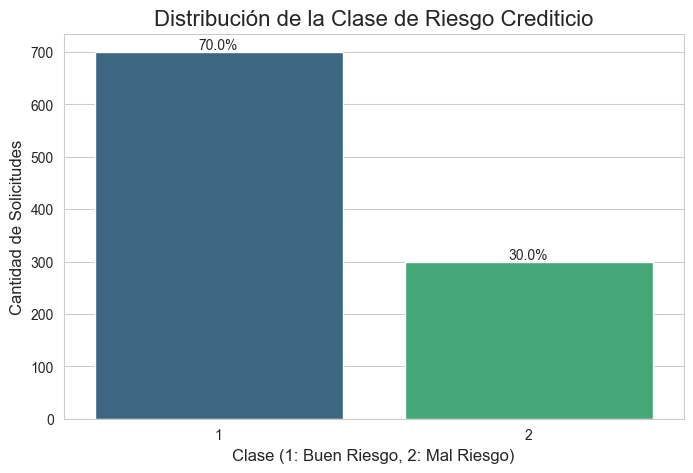

Conclusión: Observamos un desbalance de clases significativo (70% vs 30%). Esto justifica el uso de técnicas como `BalancedRandomForestClassifier` en la fase de modelado para mejorar el 'recall' de la clase minoritaria (Mal Riesgo).


In [6]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='clase', data=df, palette='viridis')
plt.title('Distribución de la Clase de Riesgo Crediticio', fontsize=16)
plt.xlabel('Clase (1: Buen Riesgo, 2: Mal Riesgo)', fontsize=12)
plt.ylabel('Cantidad de Solicitudes', fontsize=12)

# Añadir porcentajes en las barras
total = len(df['clase'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{height/total:.1%}',
            ha="center")

plt.show()

print("Conclusión: Observamos un desbalance de clases significativo (70% vs 30%). Esto justifica el uso de técnicas como `BalancedRandomForestClassifier` en la fase de modelado para mejorar el 'recall' de la clase minoritaria (Mal Riesgo).")


## 4. Análisis Bivariado (Relación de cada Característica con el Riesgo)
Ahora investigamos cómo se relacionan algunas de las características más importantes con la variable objetivo `clase`.


C:\Users\USER\AppData\Local\Temp\ipykernel_68164\2078819548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clase', y=feature, data=df, palette='pastel')


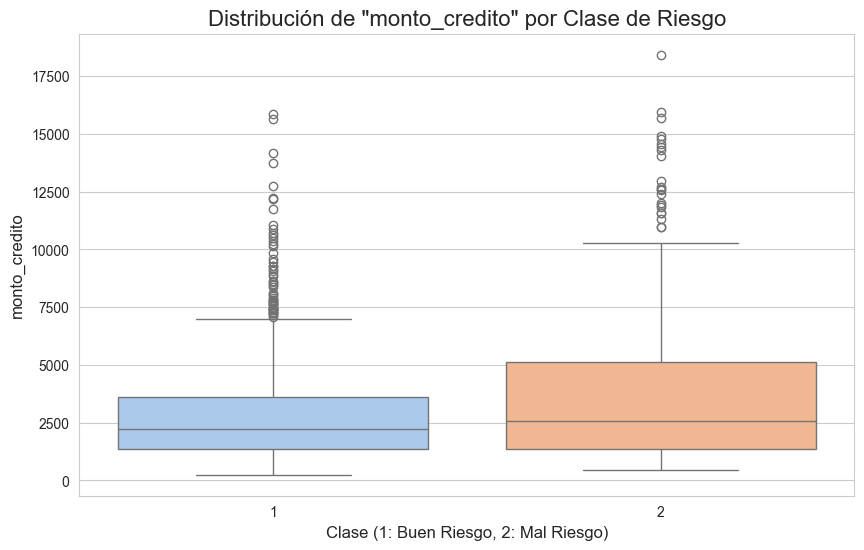

C:\Users\USER\AppData\Local\Temp\ipykernel_68164\2078819548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clase', y=feature, data=df, palette='pastel')


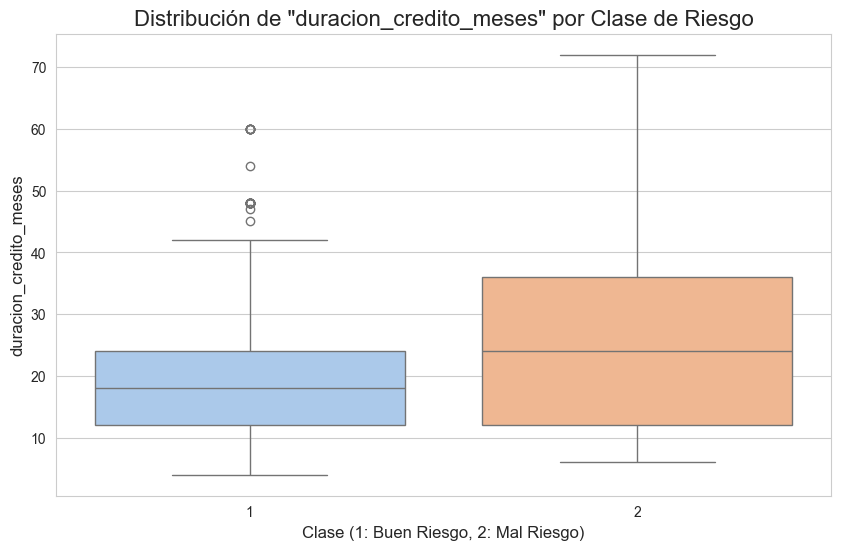

C:\Users\USER\AppData\Local\Temp\ipykernel_68164\2078819548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clase', y=feature, data=df, palette='pastel')


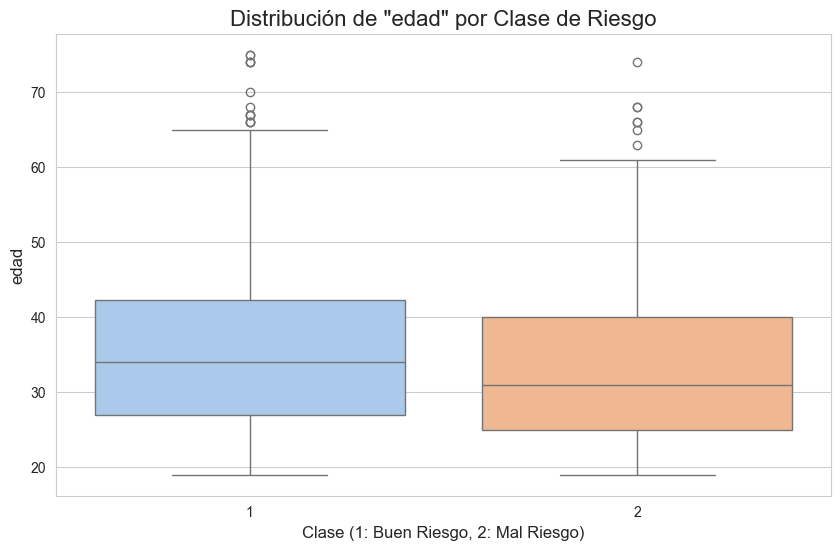

In [7]:
numeric_features_to_plot = ['monto_credito', 'duracion_credito_meses', 'edad']
for feature in numeric_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='clase', y=feature, data=df, palette='pastel')
    plt.title(f'Distribución de "{feature}" por Clase de Riesgo', fontsize=16)
    plt.xlabel('Clase (1: Buen Riesgo, 2: Mal Riesgo)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.show()

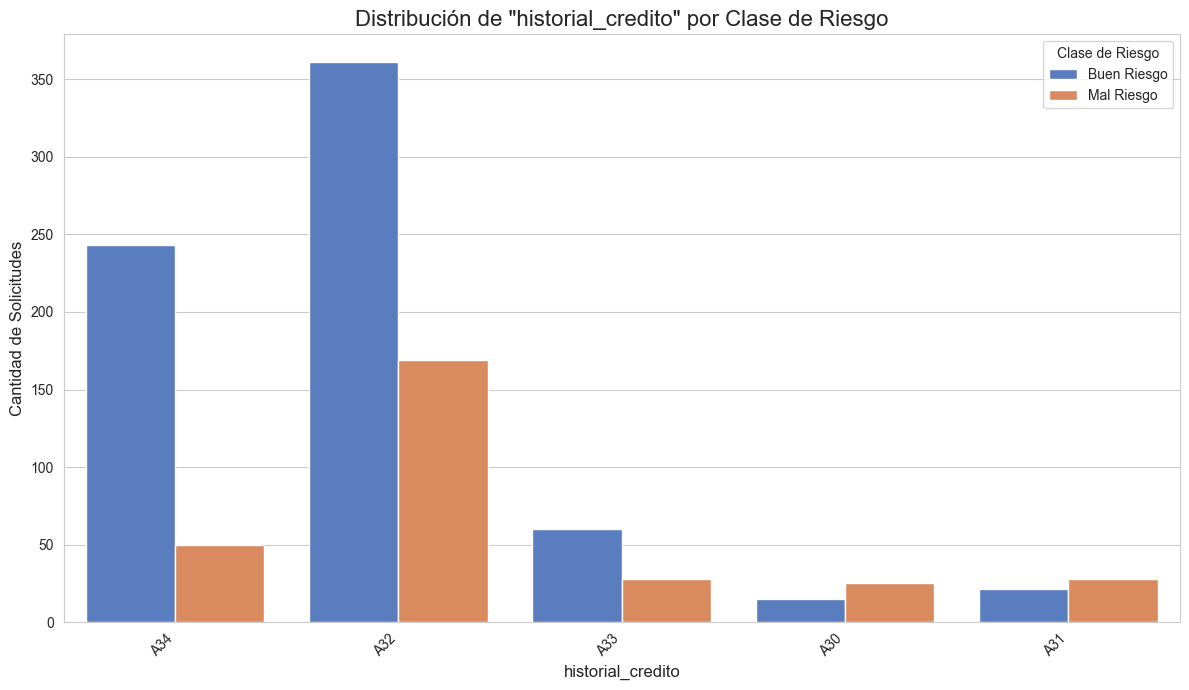

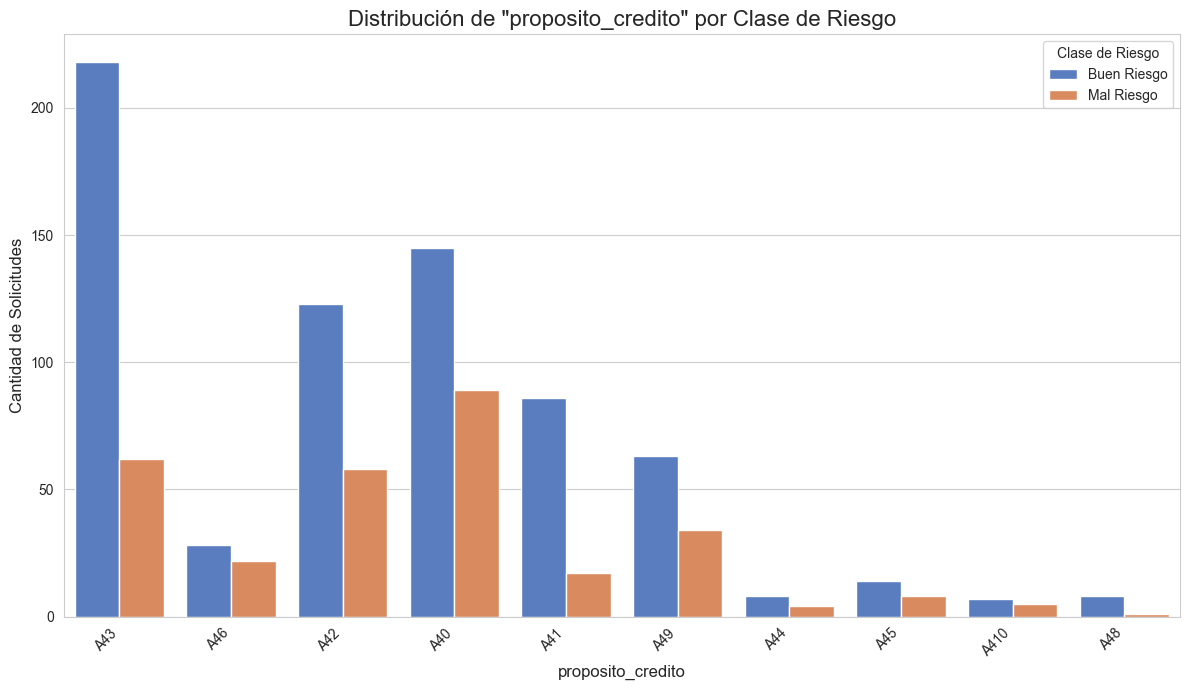

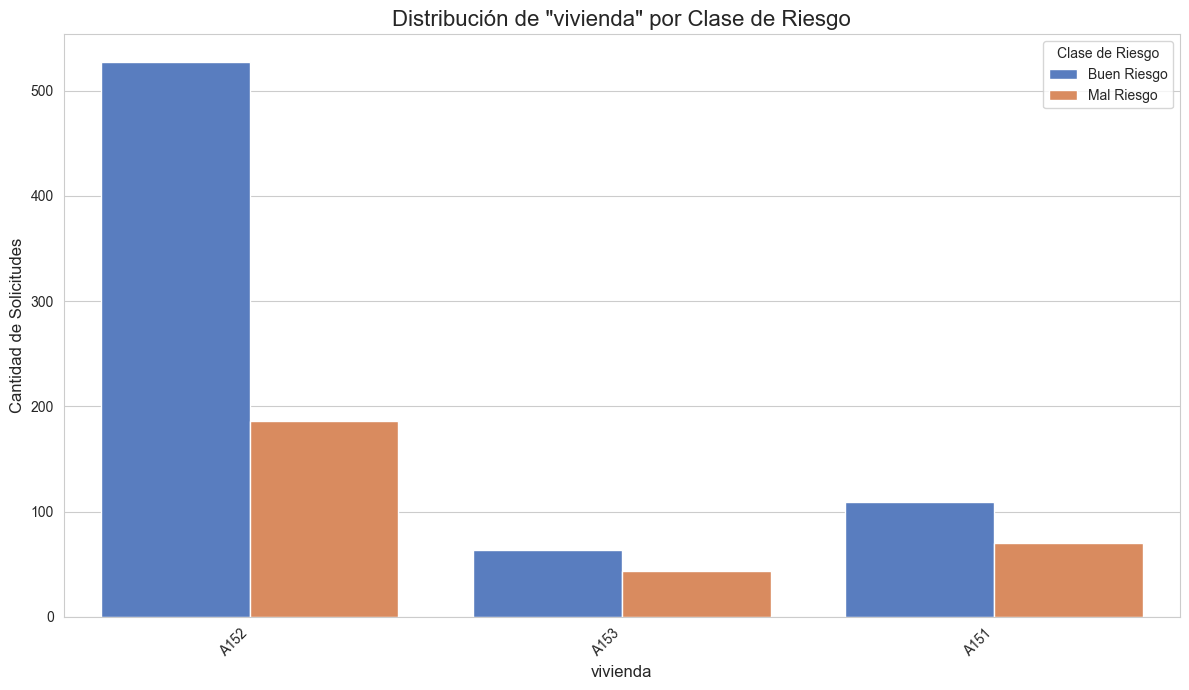

In [8]:
categorical_features_to_plot = ['historial_credito', 'proposito_credito', 'vivienda']
for feature in categorical_features_to_plot:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=feature, hue='clase', data=df, palette='muted')
    plt.title(f'Distribución de "{feature}" por Clase de Riesgo', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Cantidad de Solicitudes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Clase de Riesgo', labels=['Buen Riesgo', 'Mal Riesgo'])
    plt.tight_layout()
    plt.show()

## 5. Mapa de Calor de Correlación (Variables Numéricas) 🔥
Finalmente, analizamos la correlación lineal entre todas las variables numéricas para detectar multicolinealidad.


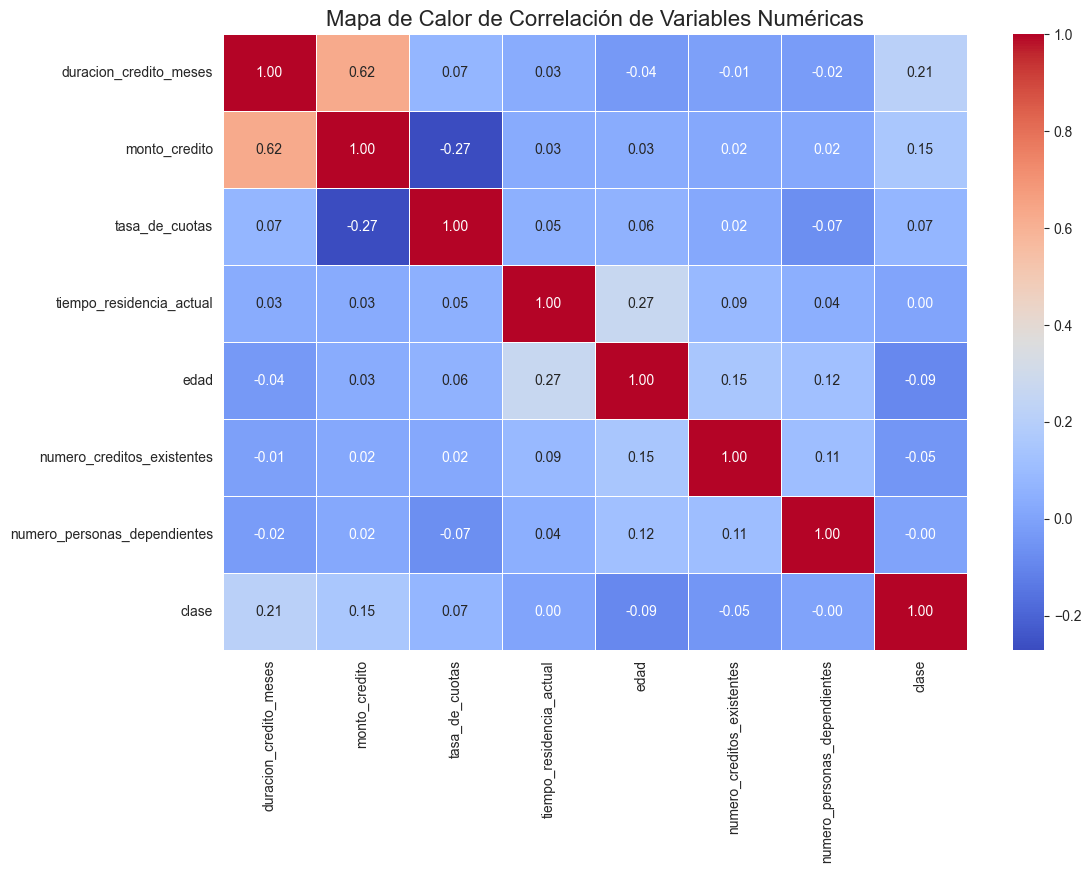

Observación: La correlación más fuerte se da entre 'monto_credito' y 'duracion_credito_meses' (0.62), lo cual es lógico: a mayor monto, mayor plazo para pagar.


In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.show()

print("Observación: La correlación más fuerte se da entre 'monto_credito' y 'duracion_credito_meses' (0.62), lo cual es lógico: a mayor monto, mayor plazo para pagar.")


## 6. Conclusiones del EDA
- **Desbalance de Clases**: El dataset es desbalanceado (70/30), lo que valida la estrategia de modelado enfocada en la métrica `recall`.
- **Principales Predictores**: El `historial_credito`, el `estado_cuenta_actual`, la `duracion_credito_meses` y el `monto_credito` muestran claras diferencias en su distribución según la clase de riesgo, sugiriendo que son predictores importantes.
- **Correlaciones**: Existe una correlación moderada entre el monto y la duración del crédito, pero no hay multicolinealidad severa que requiera la eliminación de variables.
